In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
re= test['Employee ID']

In [4]:
train.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52


In [5]:
test.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [7]:
train.isnull().sum(),test.isnull().sum(),train.shape,test.shape,train.dtypes

(Employee ID                0
 Date of Joining            0
 Gender                     0
 Company Type               0
 WFH Setup Available        0
 Designation                0
 Resource Allocation     1381
 Mental Fatigue Score    2117
 Burn Rate               1124
 dtype: int64,
 Employee ID             0
 Date of Joining         0
 Gender                  0
 Company Type            0
 WFH Setup Available     0
 Designation             0
 Resource Allocation     0
 Mental Fatigue Score    0
 dtype: int64,
 (22750, 9),
 (12250, 8),
 Employee ID              object
 Date of Joining          object
 Gender                   object
 Company Type             object
 WFH Setup Available      object
 Designation             float64
 Resource Allocation     float64
 Mental Fatigue Score    float64
 Burn Rate               float64
 dtype: object)

In [8]:
train = train.dropna(subset = ['Burn Rate'])

In [10]:
train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1278
Mental Fatigue Score    1945
Burn Rate                  0
dtype: int64

In [11]:
df=train.append(test,ignore_index=True)

In [12]:
df['Resource Allocation']=df['Resource Allocation'].fillna(df['Resource Allocation'].mean())
df['Mental Fatigue Score']=df['Mental Fatigue Score'].fillna(df['Mental Fatigue Score'].mean())

In [14]:
df.isnull().sum()

Employee ID                 0
Date of Joining             0
Gender                      0
Company Type                0
WFH Setup Available         0
Designation                 0
Resource Allocation         0
Mental Fatigue Score        0
Burn Rate               12250
dtype: int64

In [15]:
k=['Date of Joining']
for i in k:
  df[i] = pd.to_datetime(df[i])
for i in k:
  #df[i+'_'+'year'] = df[i].dt.year
  df[i+'_'+'day'] = df[i].dt.day
  df[i+'_'+'weekofyear'] = df[i].dt.weekofyear
  df[i+'_'+'month'] = df[i].dt.month
  df[i+'_'+'dayofweek'] = df[i].dt.dayofweek
  df[i+'_'+'weekend'] = (df[i].dt.weekday >=5).astype(int)
del df['Date of Joining']

In [16]:
df.nunique()

Employee ID                   33876
Gender                            2
Company Type                      2
WFH Setup Available               2
Designation                       6
Resource Allocation              11
Mental Fatigue Score            102
Burn Rate                       101
Date of Joining_day              31
Date of Joining_weekofyear       52
Date of Joining_month            12
Date of Joining_dayofweek         7
Date of Joining_weekend           2
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Gender']=df['Gender']+1
df['Company Type'] = le.fit_transform(df['Company Type'])
df['Company Type']=df['Company Type']+1
df['WFH Setup Available'] = le.fit_transform(df['WFH Setup Available'])
df['WFH Setup Available']=df['WFH Setup Available']+1

In [18]:
df['xfact']=df['Resource Allocation']*df['Mental Fatigue Score']

In [19]:
df['xeno']=df['Designation']*df['Resource Allocation']
df['feno']=df['Designation']*df['Mental Fatigue Score']
df['red_line']=df['xfact']-(df['xeno']+df['feno'])
df['yellow_line']=df['Designation']*(df['Mental Fatigue Score']-df['Resource Allocation'])

In [20]:
df['Employee_ID']=df['Employee ID']
df['Employee_ID']=df.Employee_ID.str.extract('(\d+)')
x=[]
for i in df['Employee_ID']:
  i=int(i)
  i=int(i/300000000000)
  x.append(i)
df['Employee_ID']=x
le = LabelEncoder()
df['Employee_ID'] = le.fit_transform(df['Employee_ID'])
del df['Employee ID']

In [21]:
df.head(5)

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Date of Joining_day,Date of Joining_weekofyear,Date of Joining_month,Date of Joining_dayofweek,Date of Joining_weekend,xfact,xeno,feno,red_line,yellow_line,Employee_ID
0,1,2,1,2.0,3.000000,3.8,0.16,30,40,9,1,0,11.400000,6.000000,7.6,-2.200000,1.600000,21
1,2,2,2,1.0,2.000000,5.0,0.36,30,48,11,6,1,10.000000,2.000000,5.0,3.000000,3.000000,8
2,1,1,2,2.0,4.474446,5.8,0.49,10,11,3,0,0,25.951788,8.948893,11.6,5.402896,2.651107,14
3,2,2,2,1.0,1.000000,2.6,0.20,3,45,11,0,0,2.600000,1.000000,2.6,-1.000000,1.600000,25
4,1,2,1,3.0,7.000000,6.9,0.52,24,30,7,3,0,48.300000,21.000000,20.7,6.600000,-0.300000,20


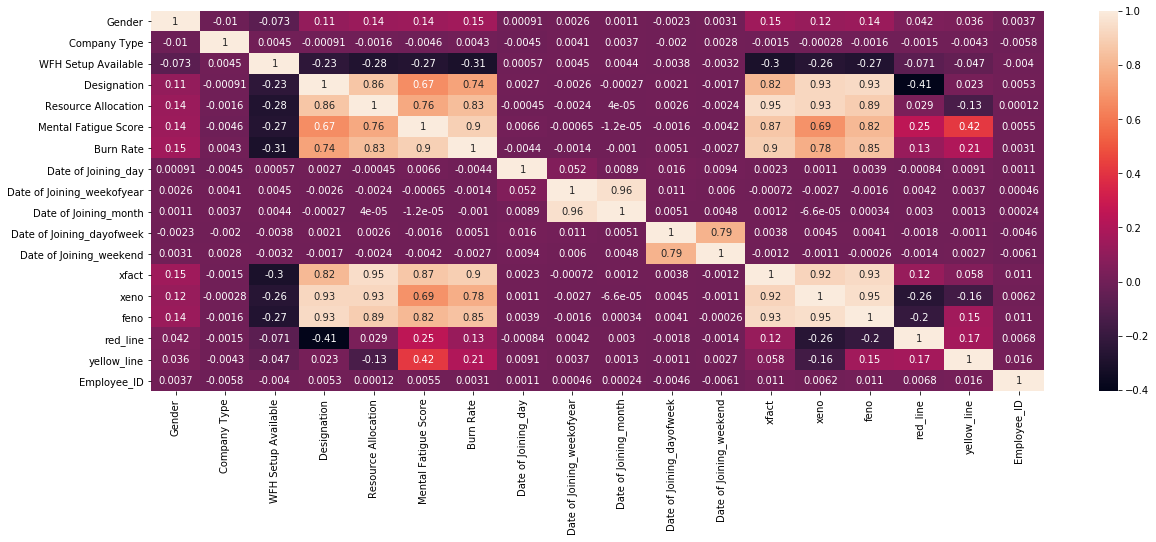

In [22]:
import seaborn as sns
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(), annot=True)

In [23]:
train = df[df['Burn Rate'].isnull()==False]
test = df[df['Burn Rate'].isnull()==True]
del test['Burn Rate']

In [24]:
train_df=train.copy()
test_df=test.copy()

In [25]:
X = train_df.drop(labels=['Burn Rate'], axis=1)
y = train_df['Burn Rate'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.10, random_state=42)

In [26]:
X_train.shape, y_train.shape, X_cv.shape, y_cv.shape

((19463, 17), (19463,), (2163, 17), (2163,))

In [30]:
from catboost import CatBoostRegressor

In [31]:
model=CatBoostRegressor(iterations=100, depth=3, learning_rate=0.1, loss_function='RMSE')


In [33]:
model.fit(X_train, y_train,use_best_model = True,eval_set=(X_cv, y_cv),plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.1840531	test: 0.1807450	best: 0.1807450 (0)	total: 155ms	remaining: 15.3s
1:	learn: 0.1706816	test: 0.1677158	best: 0.1677158 (1)	total: 158ms	remaining: 7.75s
2:	learn: 0.1588413	test: 0.1562933	best: 0.1562933 (2)	total: 161ms	remaining: 5.22s
3:	learn: 0.1484132	test: 0.1462876	best: 0.1462876 (3)	total: 164ms	remaining: 3.94s
4:	learn: 0.1390404	test: 0.1371172	best: 0.1371172 (4)	total: 168ms	remaining: 3.19s
5:	learn: 0.1311009	test: 0.1293764	best: 0.1293764 (5)	total: 171ms	remaining: 2.68s
6:	learn: 0.1237445	test: 0.1223040	best: 0.1223040 (6)	total: 174ms	remaining: 2.31s
7:	learn: 0.1172770	test: 0.1161347	best: 0.1161347 (7)	total: 177ms	remaining: 2.03s
8:	learn: 0.1111904	test: 0.1104278	best: 0.1104278 (8)	total: 180ms	remaining: 1.82s
9:	learn: 0.1057187	test: 0.1051836	best: 0.1051836 (9)	total: 183ms	remaining: 1.64s
10:	learn: 0.1010785	test: 0.1007560	best: 0.1007560 (10)	total: 185ms	remaining: 1.5s
11:	learn: 0.0969766	test: 0.0966768	best: 0.0966768 

In [34]:
model.get_best_score()

{'learn': {'RMSE': 0.06214221044767428},
 'validation': {'RMSE': 0.06317754994425555}}

In [36]:
from math import sqrt 
from sklearn.metrics import r2_score

In [37]:
import lightgbm as lgb
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_cv, label=y_cv)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.01, 
         'num_iterations': 1000,
         'num_leaves': 31,
         'max_depth': -1,
         'min_data_in_leaf': 11,
         'bagging_fraction': 0.90,
         'bagging_freq': 1,
         'bagging_seed': 3,
         'feature_fraction': 0.90,
         'feature_fraction_seed': 2,
         'early_stopping_round': 200,
         'max_bin': 500
         }

lgbm = lgb.train(params=param, verbose_eval=100, train_set=train_data, valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(X_cv)
print('RMSLE:', r2_score(y_cv,y_pred_lgbm))

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001452 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1856
[LightGBM] [Info] Number of data points in the train set: 19463, number of used features: 17
[LightGBM] [Warning] Find whitespaces in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 0.452074
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 0.0920996
[200]	valid_0's rmse: 0.0651541
[300]	valid_0's rmse: 0.0599308
[400]	valid_0's rmse: 0.0589673
[500]	valid_0's rmse: 0.0587329
[600]	valid_0's rmse: 0.058655
[700]	valid_0's rmse: 0.0586498
[800]	valid_0's rmse: 0.0586491
Early stopping, best iteration is:
[663]	valid_0's rmse: 0.0586374
RMSLE: 0.9094044066419102


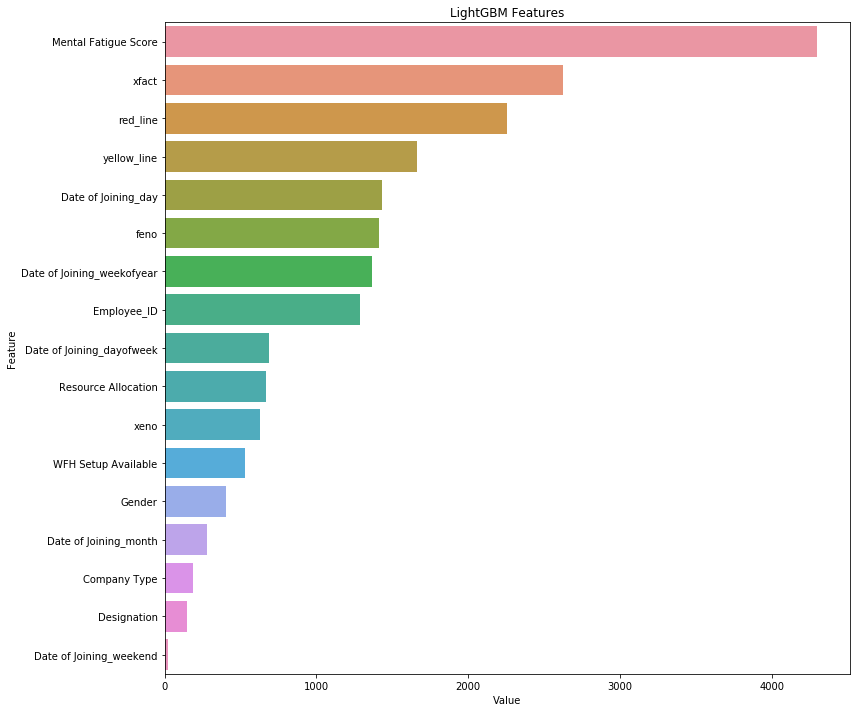

In [38]:
import seaborn as sns
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:100], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [39]:
Xtest = test_df

In [40]:
from sklearn.model_selection import KFold
from lightgbm import LGBMRegressor

errlgb = []
y_pred_totlgb = []

fold = KFold(n_splits=10, shuffle=False, random_state=42)

for train_index, test_index in fold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lgbm = LGBMRegressor(**param)
    #lgbm = LGBMRegressor(boosting='dart',learning_rate=0.2, n_estimators=1000, random_state=42, subsample=0.9)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=0, early_stopping_rounds=200)

    y_pred_lgbm = lgbm.predict(X_test)
    print("RMSLE LGBM: ", r2_score(y_test, y_pred_lgbm))

    errlgb.append(r2_score(y_test,y_pred_lgbm))
    p = lgbm.predict(Xtest)
    y_pred_totlgb.append(p)

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
RMSLE LGBM:  0.9149169166909089
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fracti

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9105197911091588
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9101235478897514
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9012456111644734
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.910239292377903
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9106946967009999
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9173649046390762
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9124920810454342
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9145527728147
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=11, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:156: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


RMSLE LGBM:  0.9107682285758676


In [41]:
np.mean(errlgb,0)

0.9112917843008272

In [42]:
lgbm_final = np.mean(y_pred_totlgb,0)
lgbm_final

array([0.60952959, 0.3541551 , 0.42805958, ..., 0.83375356, 0.57656928,
       0.13516585])

In [44]:
submission = pd.DataFrame({
        "Employee ID":re,
        "Burn Rate":lgbm_final*1.0006
    })
submission.to_csv('submit.csv', index=False)
print(submission)

                    Employee ID  Burn Rate
0      fffe31003300390039003000   0.609895
1      fffe31003300310037003800   0.354368
2      fffe33003400380035003900   0.428316
3          fffe3100370039003200   0.400359
4      fffe32003600390036003700   0.532568
...                         ...        ...
12245      fffe3900310034003700   0.414640
12246  fffe32003600330034003000   0.430459
12247  fffe31003800340039003000   0.834254
12248  fffe32003600380031003800   0.576915
12249  fffe32003100390037003800   0.135247

[12250 rows x 2 columns]


In [46]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, y_pred_totlgb))

ValueError: Found input variables with inconsistent numbers of samples: [2162, 10]